# Part I - Loan Data Exploration
## by Kimberly Gatti

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.  



## Preliminary Wrangling


In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [17]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
ordinal_var_dict = {'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','nan']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [19]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(85665, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)              float64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
I

In [20]:
df.BorrowerRate.describe()

count    85665.000000
mean         0.192524
std          0.074836
min          0.000000
25%          0.133400
50%          0.183000
75%          0.250000
max          0.497500
Name: BorrowerRate, dtype: float64

In [21]:
df.LoanStatus.value_counts()

Current                   42575
Completed                 28650
Chargedoff                 8982
Defaulted                  3750
Past Due (1-15 days)        607
Past Due (31-60 days)       268
Past Due (61-90 days)       232
Past Due (91-120 days)      220
Past Due (16-30 days)       201
FinalPaymentInProgress      163
Past Due (>120 days)         14
Cancelled                     3
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?

> There are 85,665 detailed loans in this dataset and 81 columns. That is alot of columns! Many are numeric but some are categorical, like Loan Status, Borrower State, Listing Category, Occupation, and Employment status. The columns break down into two parts, Borrower information and Loan information

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in exploring if there are any key indicators that affect the interest rate of a loan. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are so many records that appear to have been collected that narrowing it down to just a few will be necessary.  I assume that the income range will affect the interest rate. I would also assume that the relationship between previous delinquencies, on-time payments, and income range will have a high correlation to the resulting interest rate. I'm curious about the effect of Listing Category and whether something so important yet optional as adoption for example would lend itself to a higher interest rate. An added curiosity would be to decide whether the higher the interest rate, the higher the default rate.  

## Univariate Exploration

> Let's start with looking at the main variable of curiousity: interest rate



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


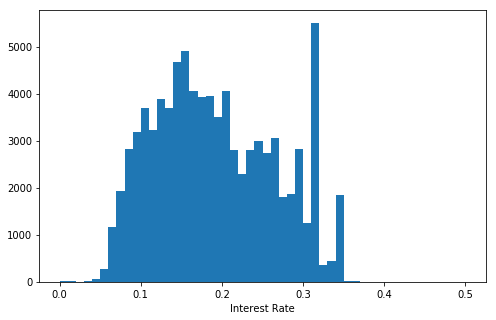

In [22]:
# start with a standard-scaled plot
binsize = .01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate',bins=bins)
plt.xlabel('Interest Rate')
plt.show()

>The feature that stands out the most is the spike around 0.32. This curve has two modes but I expected something more of a normal curve. There is certainly some outliers to the right of the data and the range being 0.5 and the Q4 covering .25 of that indicates that we are skewed right. 

>Let's look at the first factor to consider with interest rates: Income

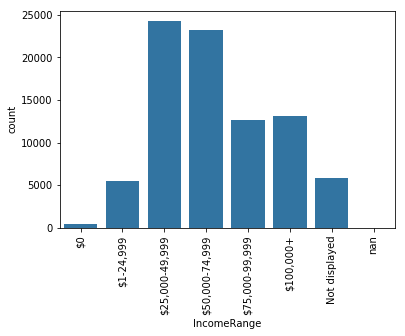

In [23]:
#plot of income range
#binsize = 1000
#bins = np.arange(0, df['IncomeRange'].max()+binsize, binsize)

#plt.figure(figsize=[8, 5])
#plt.hist(data = df, x = 'IncomeRange')
#plt.xlabel('Income Range as Reported by the Borrower')
#plt.xticks(rotation=90)
#plt.show()
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'IncomeRange',color = default_color);
plt.xticks(rotation=90);

In [24]:
#The distribution is skewed to the right as well. 
#Let's next look at deliquencies. First, the deliquencies in the last 7 years

#sb.countplot(data = df, x = 'DelinquenciesLast7Years',color = default_color);
#plt.xticks(rotation=90);

binsize = 5
bins = np.arange(0, df['DeliquenciesLast7Years'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'DeliquenciesLast7Years',bins=bins)
plt.xlabel('Delinquencies')
plt.show()


KeyError: 'DeliquenciesLast7Years'

In [25]:
df.DelinquenciesLast7Years 


0         4.0
1         0.0
2         0.0
3        14.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10       28.0
11        1.0
12        0.0
13        0.0
14        0.0
15        0.0
16       12.0
17        0.0
18        0.0
19        0.0
20        0.0
21        5.0
22        0.0
23        0.0
24        8.0
25        4.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
85635     0.0
85636     7.0
85637    34.0
85638     0.0
85639     0.0
85640     0.0
85641     0.0
85642    17.0
85643     1.0
85644     0.0
85645     0.0
85646    14.0
85647     1.0
85648     0.0
85649     4.0
85650     0.0
85651    12.0
85652     0.0
85653     0.0
85654     0.0
85655    21.0
85656     1.0
85657     0.0
85658    23.0
85659     0.0
85660     0.0
85661     0.0
85662     0.0
85663     0.0
85664     NaN
Name: DelinquenciesLast7Years, Length: 85665, dtype: float64

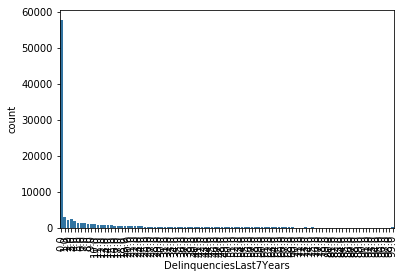

In [26]:
sb.countplot(data = df, x = 'DelinquenciesLast7Years',color = default_color);
plt.xticks(rotation=90);

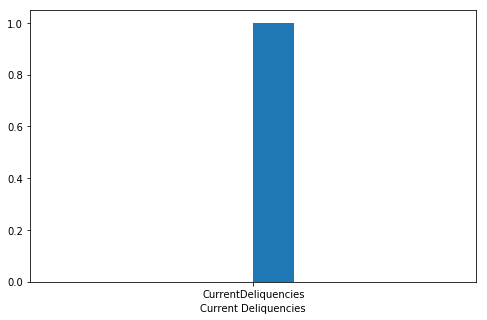

In [27]:

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'CurrentDeliquencies')
plt.xlabel('Current Deliquencies')
plt.show()

In [28]:
#Its difficult to see what is happening due to the large count at 0. 
#Let's try a log scale

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


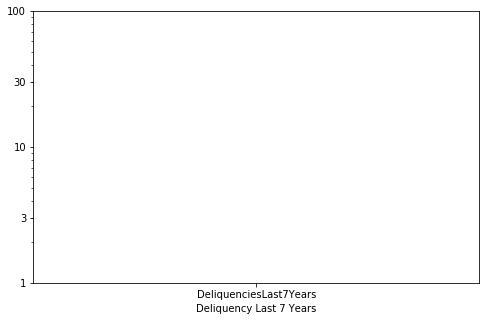

In [29]:

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'DeliquenciesLast7Years')
plt.yscale('log')
plt.yticks([1, 3, 10,30, 100],['1', '3','10','30','100'])
plt.xlabel('Deliquency Last 7 Years')
plt.show()

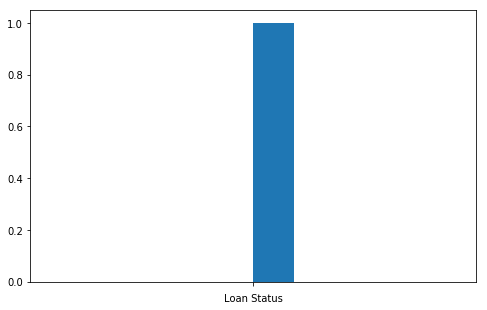

In [30]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = '')
plt.xlabel('Loan Status')
plt.xticks(rotation=90)
plt.show()



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [31]:
df['DeliquenciesLast7Years'].dtypes

KeyError: 'DeliquenciesLast7Years'

>There is an interesting spike around 0.32 and there must be an outlier to the right of the data. Considering the 4th quartile of data goes from 0.25-0.497, its interesting to me that the spike is in that range and the highest value is so far out. It appears to have two spikes where one is what you would expect with a gradual growth and a gradual fall but the second is literally a spike. 

>We will not look at the first variable of interest: deliquencies

In [32]:
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years

NameError: name 'CurrentDelinquencies' is not defined

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

